In [1]:
import pandas as pd
import numpy as np
import scipy as sp
# Идея взять за генеральную совокупность результаты участния в олимпиаде школьнков по всей россии 
# и сравнить их с результатами школьников Москвы,
# Выдвинув гипотезу нулевую гипотезу, что результаты не зависят от региона проживания участника

In [2]:
# Москва
mos = pd.read_csv(r'C:\Users\sepa\Desktop\curse\mos.csv', delimiter=';', encoding='Windows-1251')
mos

,id,Поток,Профиль олимпиады,Регион нахождения школы,Сумма баллов I этапа,Результат участия в олимпиаде
0,118,Олимпиада 11 класс,Обществознание,Москва,60,Участник первого этапа
1,158,Олимпиада 11 класс,Обществознание,Москва,60,Участник первого этапа
2,275,Олимпиада 11 класс,Обществознание,Москва,59,Участник первого этапа
3,353,Олимпиада 11 класс,Обществознание,Москва,63,Участник первого этапа
4,442,Олимпиада 11 класс,Обществознание,Москва,64,Участник первого этапа
...,...,...,...,...,...,...
1460,43452,Олимпиада 11 класс,Обществознание,Москва,68,Участник второго этапа
1461,12475,Олимпиада 11 класс,Обществознание,Москва,82,Участник второго этапа
1462,13973,Олимпиада 11 класс,Обществознание,Москва,74,Участник второго этапа
1463,20018,Олимпиада 11 класс,Обществознание,Москва,81,Участник второго этапа


In [3]:
# не Москва
unmos = pd.read_csv(r'C:\Users\sepa\Desktop\curse\unmos.csv', delimiter=';', encoding='Windows-1251')
unmos

,id,Поток,Профиль олимпиады,Регион нахождения школы,Сумма баллов I этапа,Результат участия в олимпиаде
0,21500,Олимпиада 11 класс,Обществознание,Санкт-Петербург,34,Участник первого этапа
1,17437,Олимпиада 11 класс,Обществознание,Санкт-Петербург,63,Участник первого этапа
2,250,Олимпиада 11 класс,Обществознание,Санкт-Петербург,58,Участник первого этапа
3,558,Олимпиада 11 класс,Обществознание,Санкт-Петербург,55,Участник первого этапа
4,1539,Олимпиада 11 класс,Обществознание,Санкт-Петербург,66,Участник первого этапа
...,...,...,...,...,...,...
4017,27804,Олимпиада 11 класс,Обществознание,Санкт-Петербург,68,Участник второго этапа
4018,28977,Олимпиада 11 класс,Обществознание,Санкт-Петербург,68,Участник второго этапа
4019,11767,Олимпиада 11 класс,Обществознание,Санкт-Петербург,68,Участник второго этапа
4020,12408,Олимпиада 11 класс,Обществознание,Санкт-Петербург,68,Участник второго этапа


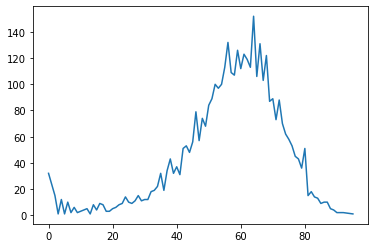

In [4]:
# Дело в том, что данные не похожи на нормальное распределение
from collections import Counter
a = Counter(unmos['Сумма баллов I этапа'])
x = sorted(a)
y = [a[i] for i in x]
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

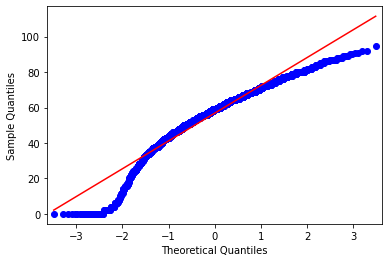

In [5]:
# на графиках виден длинный левый хвост
# QQ Plot
from statsmodels.graphics.gofplots import qqplot
# q-q plot
qqplot(unmos['Сумма баллов I этапа'], line='s')
plt.show()

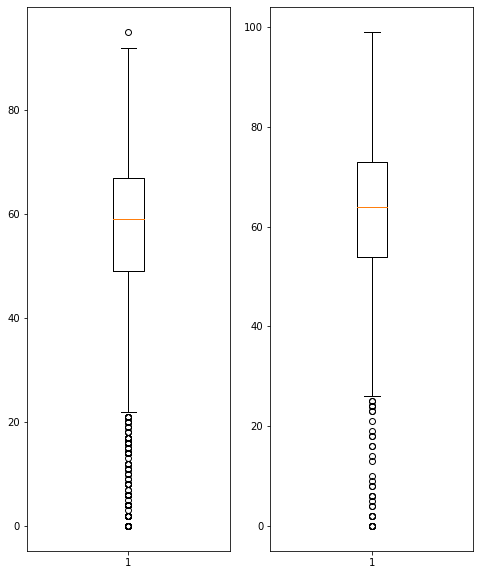

In [6]:
# Отраженные на боксплотах выбросы нельзя считать ошибками, так как это реальные баллы полученные участниками
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(8, 10)
axs[0].boxplot(unmos['Сумма баллов I этапа'])
axs[1].boxplot(mos['Сумма баллов I этапа'])
plt.show()

In [7]:
# Также эти данные не проходят провеку на нормальность имея оооочень низкое p-значение
sp.stats.normaltest(unmos['Сумма баллов I этапа'])

NormaltestResult(statistic=685.0875290423651, pvalue=1.7184355877414937e-149)

In [8]:
# Но на сколько я понимаю распределение отличающееся от нормального не должно помешать тестированию гипотезы, т.к.
# Какова бы ни была форма распределения генеральной совокупности,
# выборочное распределение стремится к нормальному, 
# а его дисперсия задается центральной предельной теоремой.

In [9]:
# Средняя ген.совокупноси
mu = unmos['Сумма баллов I этапа'].mean()
mu

56.83689706613625

In [10]:
# Стандартное отклонение ген.совокупности
sigma = unmos['Сумма баллов I этапа'].std()
sigma

15.703775221226344

In [11]:
# Выборочная средняя (у москвичей)
X_ = mos['Сумма баллов I этапа'].mean()
X_

62.23412969283277

In [12]:
# размер выборки
n = mos.count()[0]
n

1465

In [13]:
# ошибка среднего
SE = sigma/(n**.5)
SE

0.41028463956128486

In [14]:
alfa = 0.05
# z значение
z = (X_ - mu)/SE
z

13.154849356455912

In [15]:
# p значение
sp.stats.norm.sf(z)

7.980064144924512e-40

In [16]:
# Учитывая значение ниже 0.025 (т.к. отклонение возможно в обе стороны) нулевую гипотезу можно отклонить
# Следовательно с вероятностью 95% результаты участников из г. Москвы отличаются от результатов в целом по стране

___________________


In [19]:
# Не совсем понятно, можно ли результаты участников не из Москвы рассматривать как генеральную совокупность.
# Возможно ее стоит рассмотреть как первую выборку из генеральной совокупности, а москвичей как вторую
# и для анализа использовать парный критерий Стьюдента
# в таком случае ...

In [20]:
X_0 = unmos['Сумма баллов I этапа'].mean()
SD_0 = unmos['Сумма баллов I этапа'].std()
n_0 = unmos['Сумма баллов I этапа'].count()
print(f'Для немосковских школьников - Среднее: {X_0}, Отклонение: {SD_0}, Количество: {n_0}')

Для немосковских школьников - Среднее: 56.83689706613625, Отклонение: 15.703775221226344, Количество: 4022


In [21]:
X_1 = mos['Сумма баллов I этапа'].mean()
SD_1 = mos['Сумма баллов I этапа'].std()
n_1 = mos['Сумма баллов I этапа'].count()
print(f'Для немосковских школьников - Среднее: {X_1}, Отклонение: {SD_1}, Количество: {n_1}')

Для немосковских школьников - Среднее: 62.23412969283277, Отклонение: 15.347760501167631, Количество: 1465


In [23]:
# ошибка средних для парного критерия
SE = ((SD_0**2/n_0)+(SD_1**2/n_1))**.5
SE

0.4712774674881318

In [26]:
t = (X_1 - X_0)/SE
t

11.452346014892877

In [35]:
# степени свободы (degrees of freedom) для парного критерия
df = n_0 + n_1 - 2
sp.stats.t.sf(t, df)

2.5051776691268407e-30

In [ ]:
# Так как t критерий так же значительно меньше 0,025 
# гопотезу о схожести результатов двух этих выборок можно отклонить с вероятностью 95%